#TASK1. 데이터 출처/데이터 불러오기

kaggle:  https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

**Context**
Collection of documents and its emotions, It helps greatly in NLP Classification tasks

**Content**
List of documents with emotion flag, Dataset is split into train, test & validation for building the machine learning model

**Example :-**
i feel like I am still looking at a blank canvas blank pieces of paper;sadness

**Acknowledgements**
Thanks to Elvis - https://lnkd.in/eXJ8QVB & Hugging face team
The technique to prepare the dataset - https://www.aclweb.org/anthology/D18-1404/

**Inspiration**
Dataset helps the community to develop emotion classification models with NLP based approach.

In [22]:
import pandas as pd
data= pd.read_csv("dataset_emotion.txt", sep=";", header=None, names=["text", "label"])

#TASK2. 기초통계확인

In [23]:
data.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [24]:
data.shape

(18000, 2)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18000 non-null  object
 1   label   18000 non-null  object
dtypes: object(2)
memory usage: 281.4+ KB


두 컬럼 모두 결측치가 없고, object 타입임. 텍스트 데이터가 18000개, 변수는 2개 존재함을 알 수 있음.

In [26]:
data['label'].value_counts()

,count
label,
joy,6057
sadness,5247
anger,2434
fear,2161
love,1463
surprise,638


'기쁨', '슬픔', '화남', '두려움', '사랑', '놀람' 이렇게 여섯가지 범주가 존재하며 여섯개의 범주 모두 충분한 데이터 존재.

In [27]:
from collections import Counter

sad_words = ' '.join(data[data['label']=='sadness']['text']).split()
Counter(sad_words).most_common(20)

[('i', 8584),
 ('feel', 3715),
 ('and', 3042),
 ('to', 2654),
 ('the', 2442),
 ('a', 1868),
 ('feeling', 1716),
 ('of', 1593),
 ('that', 1467),
 ('my', 1430),
 ('in', 1028),
 ('like', 988),
 ('it', 983),
 ('so', 928),
 ('for', 864),
 ('im', 786),
 ('was', 751),
 ('me', 750),
 ('but', 749),
 ('have', 697)]

감정별로 어떤 단어가 많이 쓰이는지 확인. 불용어가 많이 나오는 것을 확인할 수 있음.

In [28]:
data= data.drop_duplicates()
print(data.shape)

(17999, 2)


중복 데이터 제거-> 17999개의 데이터가 남음

#TASK3. 분석 목적/인사이트 설명

텍스트 데이터로 필자의 감정 예측하기

## 감정별 특징 파악
sadness-> 긴문장, 부정적 단어
joy-> 짧거나, 긍정적 단어

## 감정 구분 난이도
어떤 감정이 상대적으로 쉽게 예측되고, 어렵게 예측되는지 파악. 감정 간의 유사성이나 중첩되는 표현 파악

## 중요 단어/ 피처
감정 예측 시 어떤 단어를 중요하게 보는지 분석

## 실무
고객 피드백 분석이나 sns 감정 모니터링에서 활용 가능.

모델이 감정을 구분하는 기준이 궁금함.



#TASK4. EDA-유의미한 시각화 3개 이상

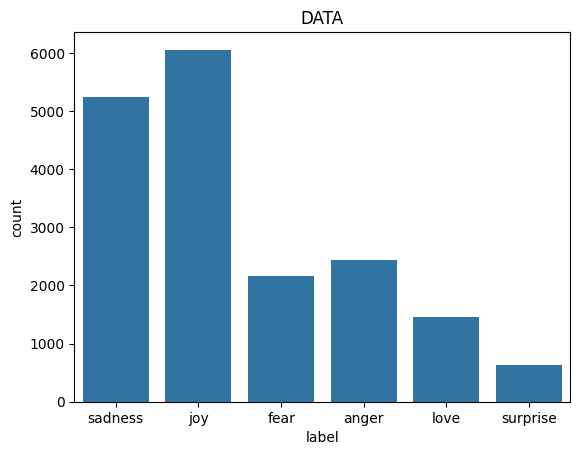

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=data)
plt.title("DATA")
plt.show()

감정별로 데이터가 얼마나 있는지 파악. 'sadness', 'joy'가 다른 클래스에 비해 월등히 많음을 알 수 있음.

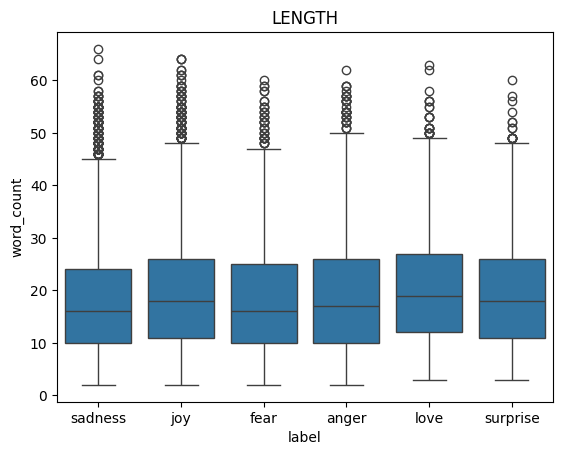

In [31]:
data['word_count'] = data['text'].apply(lambda x: len(x.split()))
sns.boxplot(x='label', y='word_count', data=data)
plt.title("LENGTH")
plt.show()

단어 개수를 계산해 컬럼에 추가하고, 감정별 단어 개수를 시각화해봄. 생각보다 비슷하게 나타남을 확인할 수 있음.

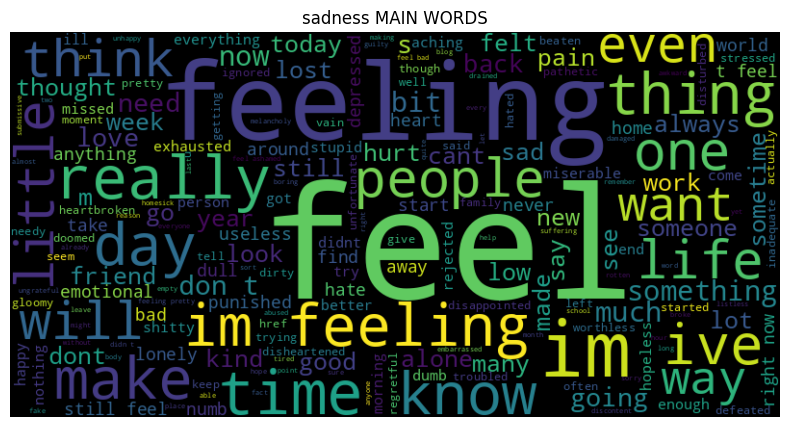

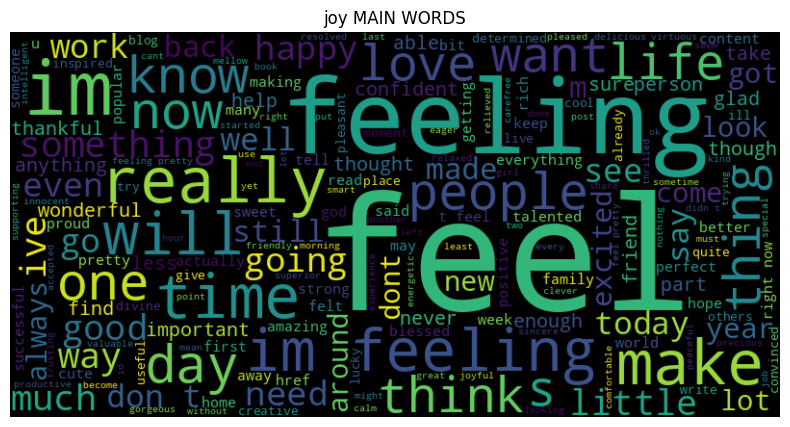

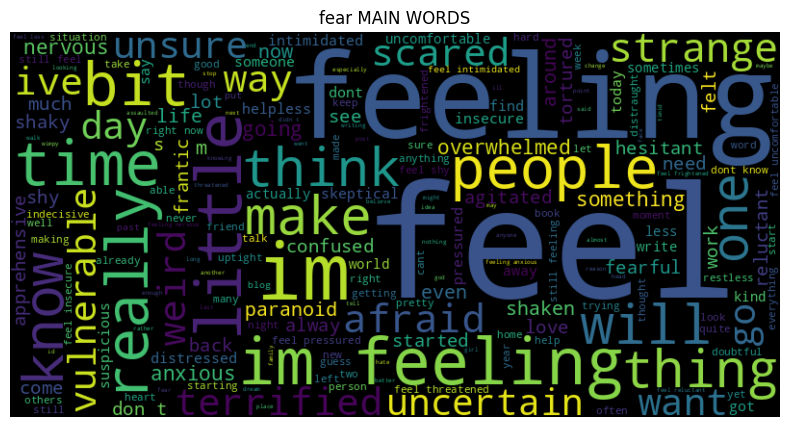

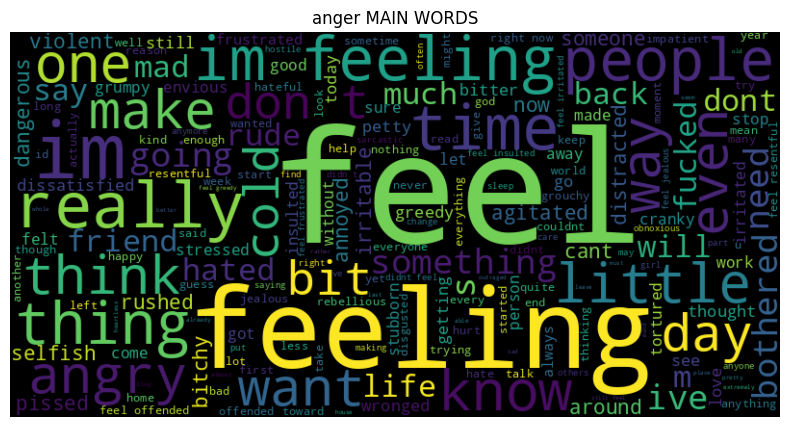

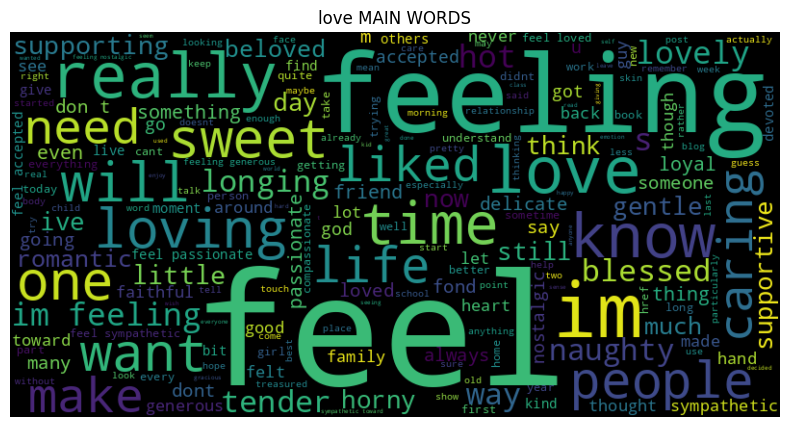

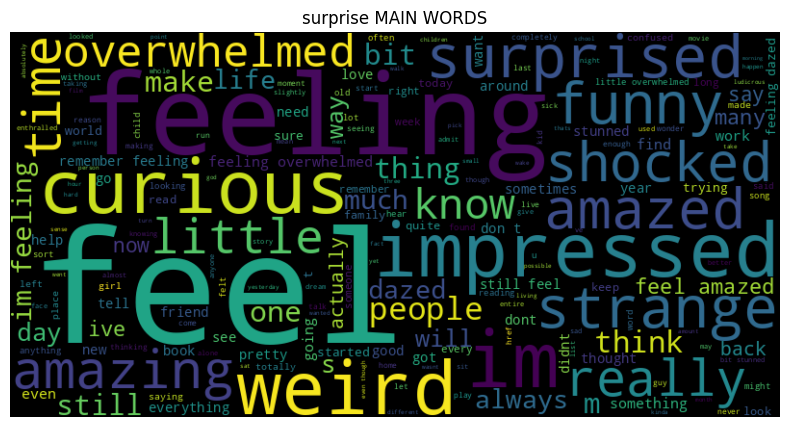

In [32]:
from wordcloud import WordCloud

for emotion in data['label'].unique():
    text = ' '.join(data[data['label']==emotion]['text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{emotion} MAIN WORDS")
    plt.show()

감정별 워드클라우드. 해당 감정과 관련된 단어들이 조금 보이지만, 전처리 전 단계이므로 불용어, feeling과 같은 흔한 단어들이 많이 등장함을 알 수 있음.